In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Quality is the label which we need to predict

In [3]:
#checking for the counts of label
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
#checking for the shape of the data
data.shape

(1599, 12)

There r 1599 rows and 12 columns

In [5]:
#Checking for stats
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking for null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#checking for type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


from info method we got to know that there are no null values and the type of data is float and the label data is of integer type

In [8]:
#plotting the heatmap to check the relation between the features
df_corr=data.corr().abs()

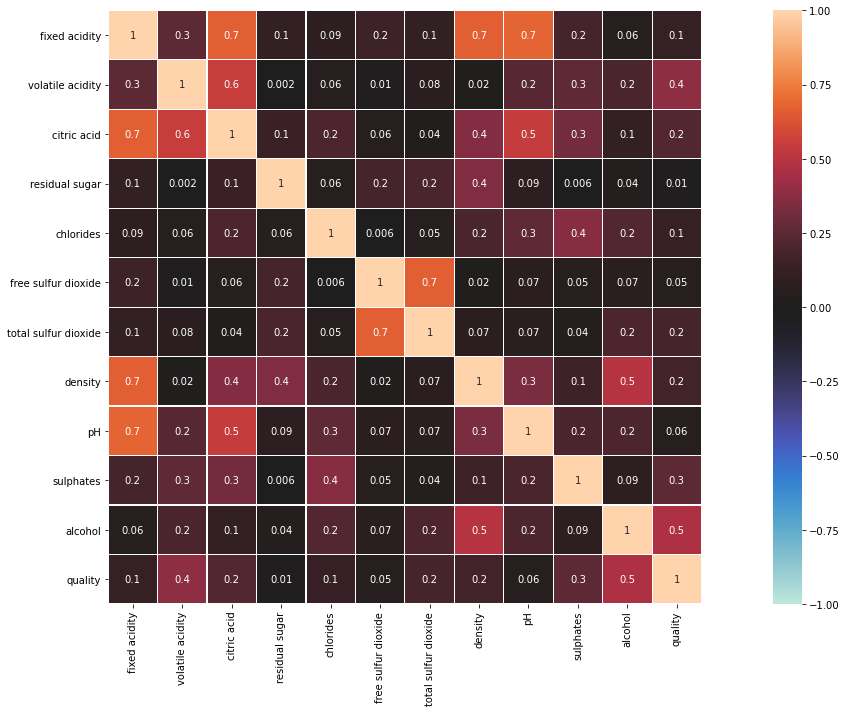

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

From heat map no feature is co-related with the other feature so there is no multicollinearty so no need to drop any of the feature, the label is highly corelated with alchoal and least corelated with residual sugar

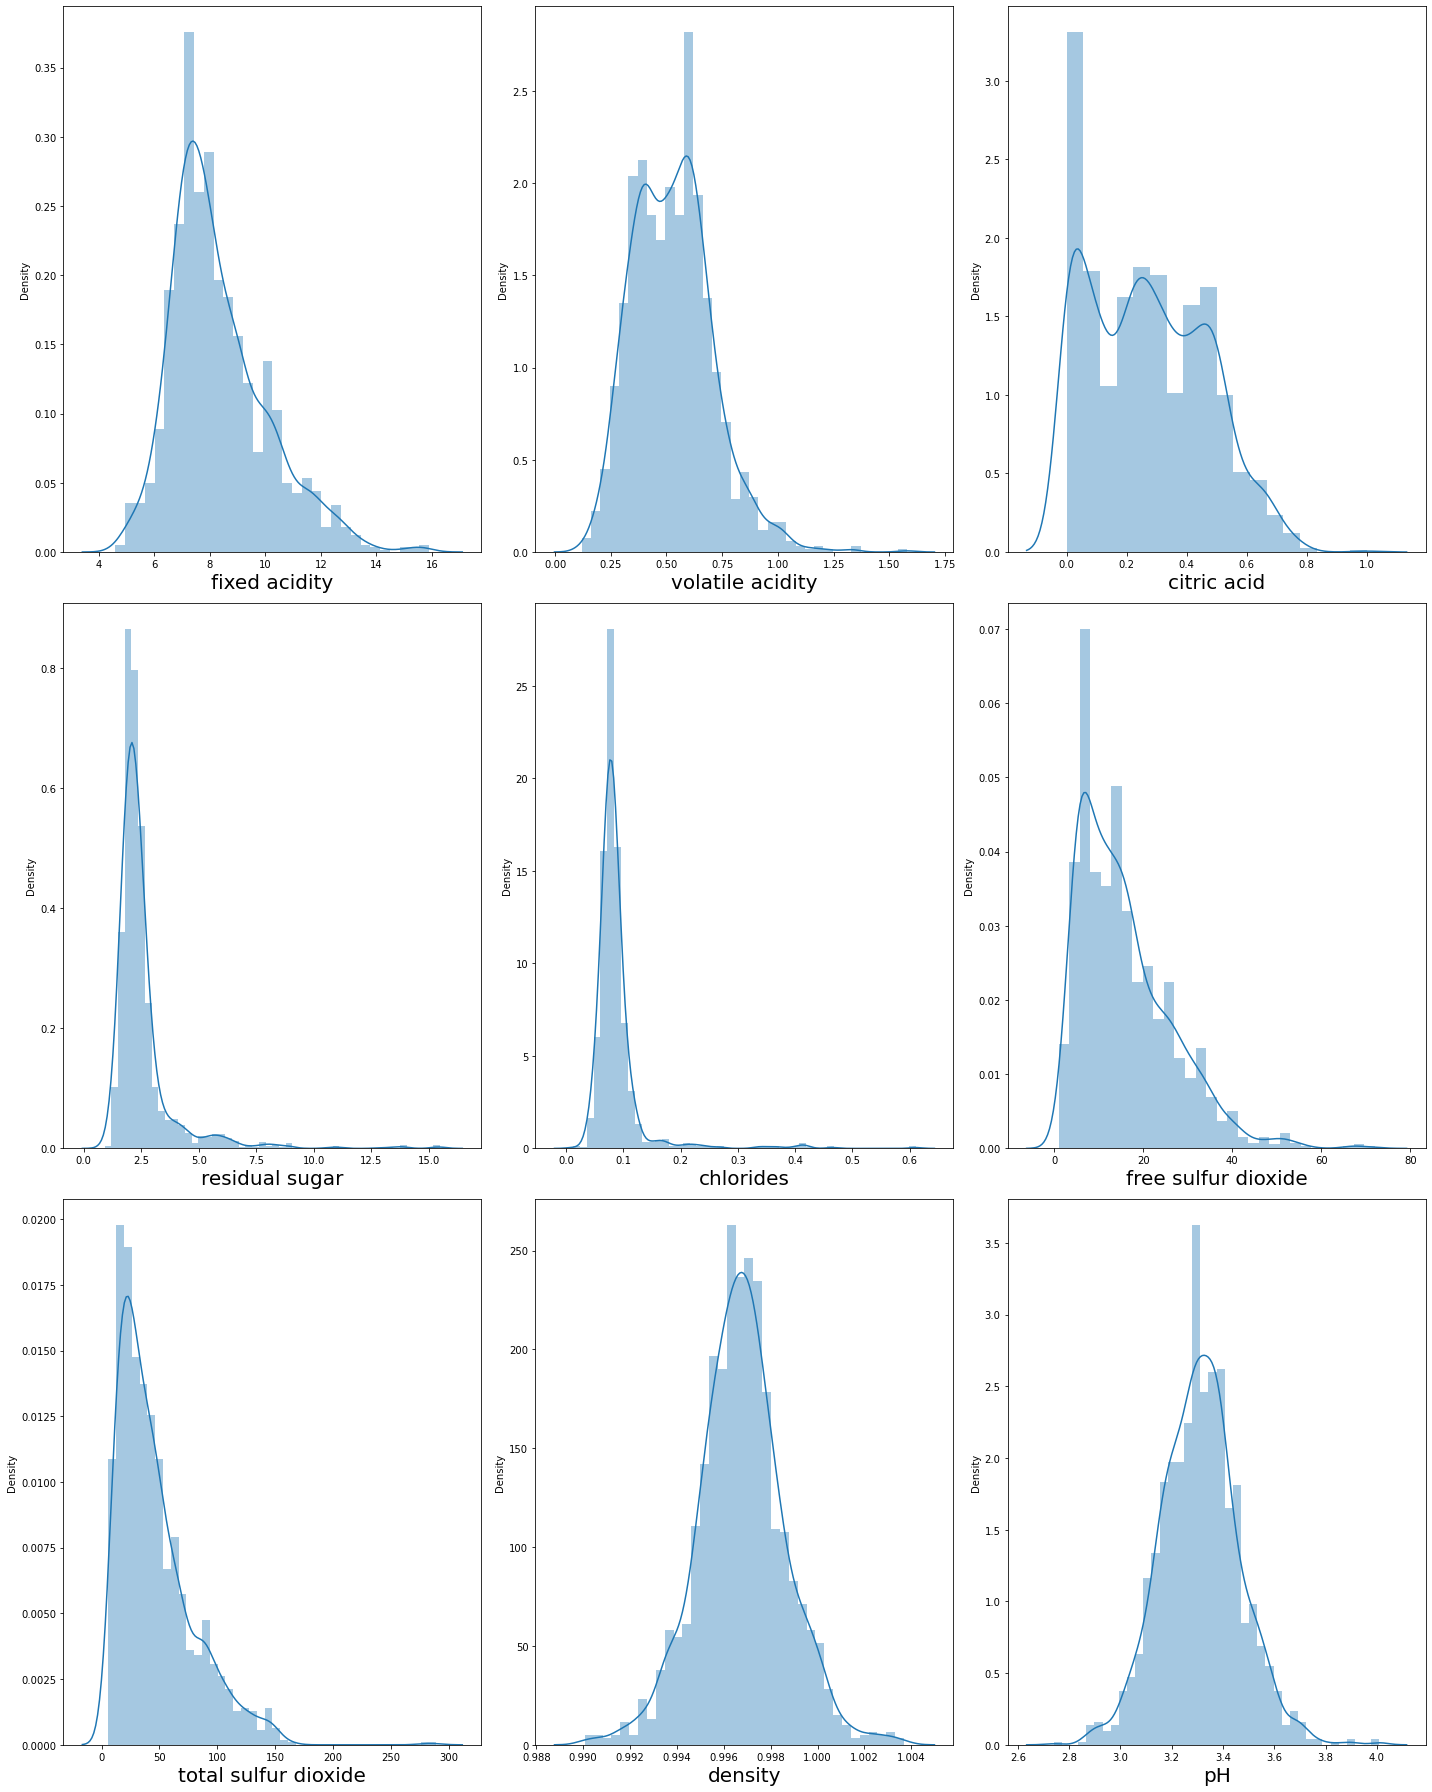

In [10]:
#checking for the distribution of the data
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


We have lot of skewed data in the dataset we have to gohead and reduce the skewness using zscore and lets plot boxplot to check where the outliers present exactly

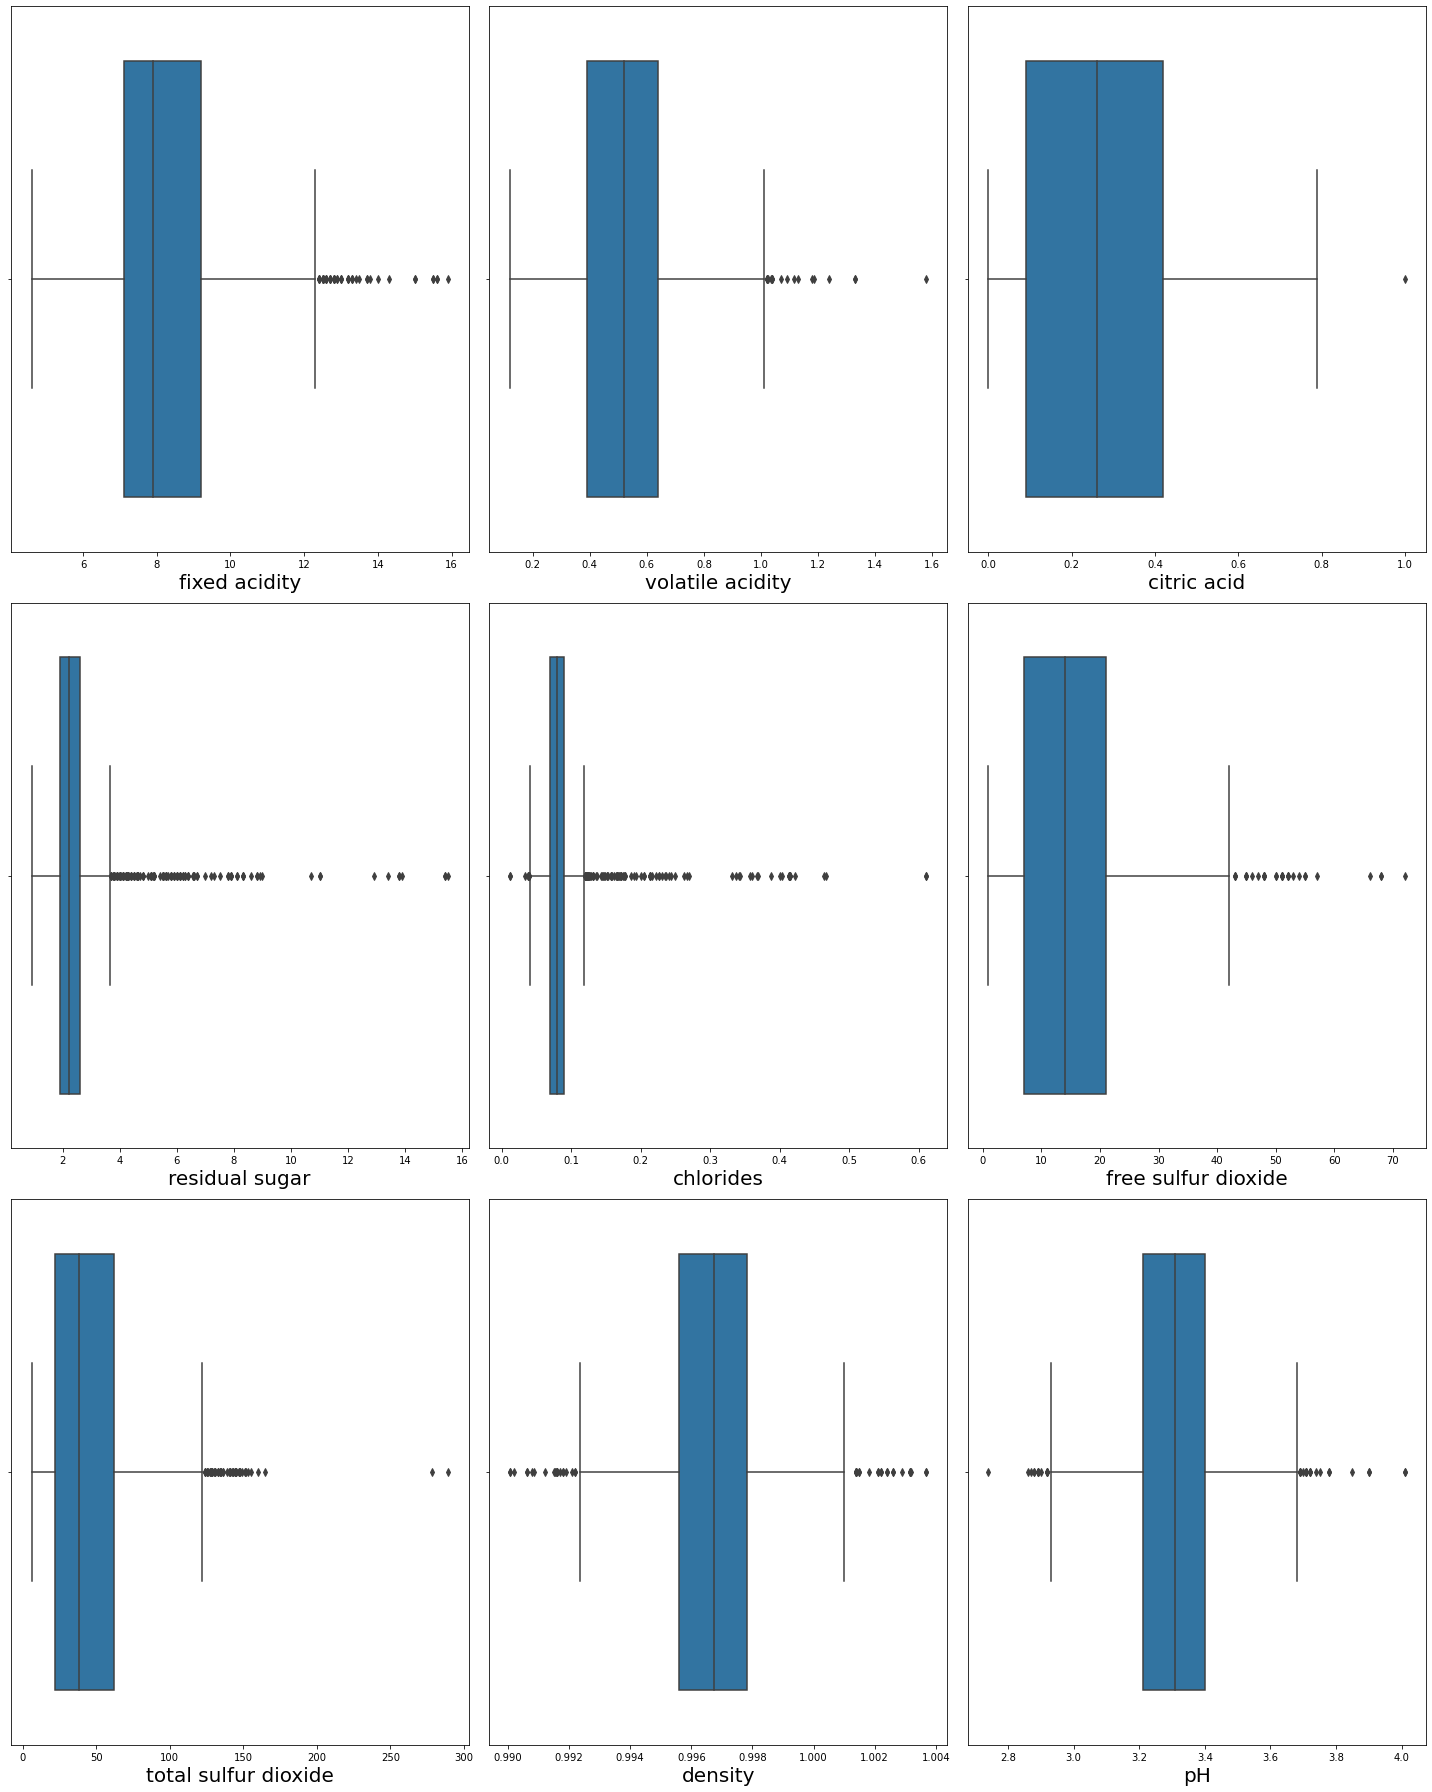

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


There r many outliers present in the dataset so lets use zscore to remove some of the outliers

In [12]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [13]:
#importing scipy module
from scipy import stats
#using zscore method to treat outliers
z=np.abs(stats.zscore(data))#abs=absolute numberprint(z)
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [14]:
#Rows having outliers more than 3 standard deviation
print('Row Numbers \n',np.where(z>3)[0])

Row Numbers 
 [  13   14   15   15   17   17   19   33   38   42   43   45   57   81
   81   83   86   88   91   92   95  106  106  109  120  126  127  142
  144  147  151  151  151  151  163  164  169  169  181  199  226  226
  240  243  244  258  258  274  281  291  324  325  339  340  347  354
  374  381  391  396  396  400  400  442  442  451  459  467  480  480
  494  515  517  544  554  554  555  555  557  557  568  584  588  591
  595  608  614  636  639  649  649  651  652  652  652  672  672  684
  690  690  692  692  695  723  724  730  754  776  777  795  821  832
  836  837  889  899  911  917  923  925  926  982 1017 1018 1043 1051
 1051 1071 1074 1079 1079 1081 1081 1111 1114 1131 1154 1165 1175 1186
 1231 1235 1244 1244 1244 1260 1269 1269 1270 1270 1288 1289 1295 1296
 1299 1299 1300 1312 1316 1319 1319 1321 1358 1367 1370 1370 1372 1372
 1374 1374 1434 1434 1434 1435 1435 1435 1469 1474 1474 1474 1476 1476
 1476 1478 1493 1496 1505 1558 1558 1570 1574 1589]


In [15]:
#Columns having outliers more than 3 standard deviation
print('column numbers \n',np.where(z>3)[1])

column numbers 
 [ 9  5  5  6  4  9  4  3  1  4  9  8  5  4  9  4  9  9  9  9  8  4  9  6
  1  1  1 10 10  4  2  4  8  9  3  3  4  9  4  1  4  9  4  0  0  4  9  3
  4  4  3  3  9  9  0  6  0  0  0  3  5  3  5  0  7  4 11 10  3  7  3  6
 11  0  0  7  0  7  0  7  4  5 10  6  3  7  9  6  9  3  6  6  0  3 10  1
  6  6  1 11  4  9  8  9  1  4  4  4  4  9 10 11  7  7  7 11  3  3  3  5
  5  5  7  7  3  4  9  3  3  3  6  3  6  8  7  5  5  4  5  3  5  3  3  5
  6  4  7 10  7 10  9  9  5  5  1 11  8  1  8  4  9  8  5  9  4  9  4  9
  4 11  3  5  7  3  5  7 11  3  5  7  3  5  7 11  6  6 11  4  5  4  3  3]


In [16]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [17]:
data.shape

(1451, 12)

before there are 1599 rows after using zscore some of the rows which r having outliers r dropped so now the shape of the dataset of rows got reduced

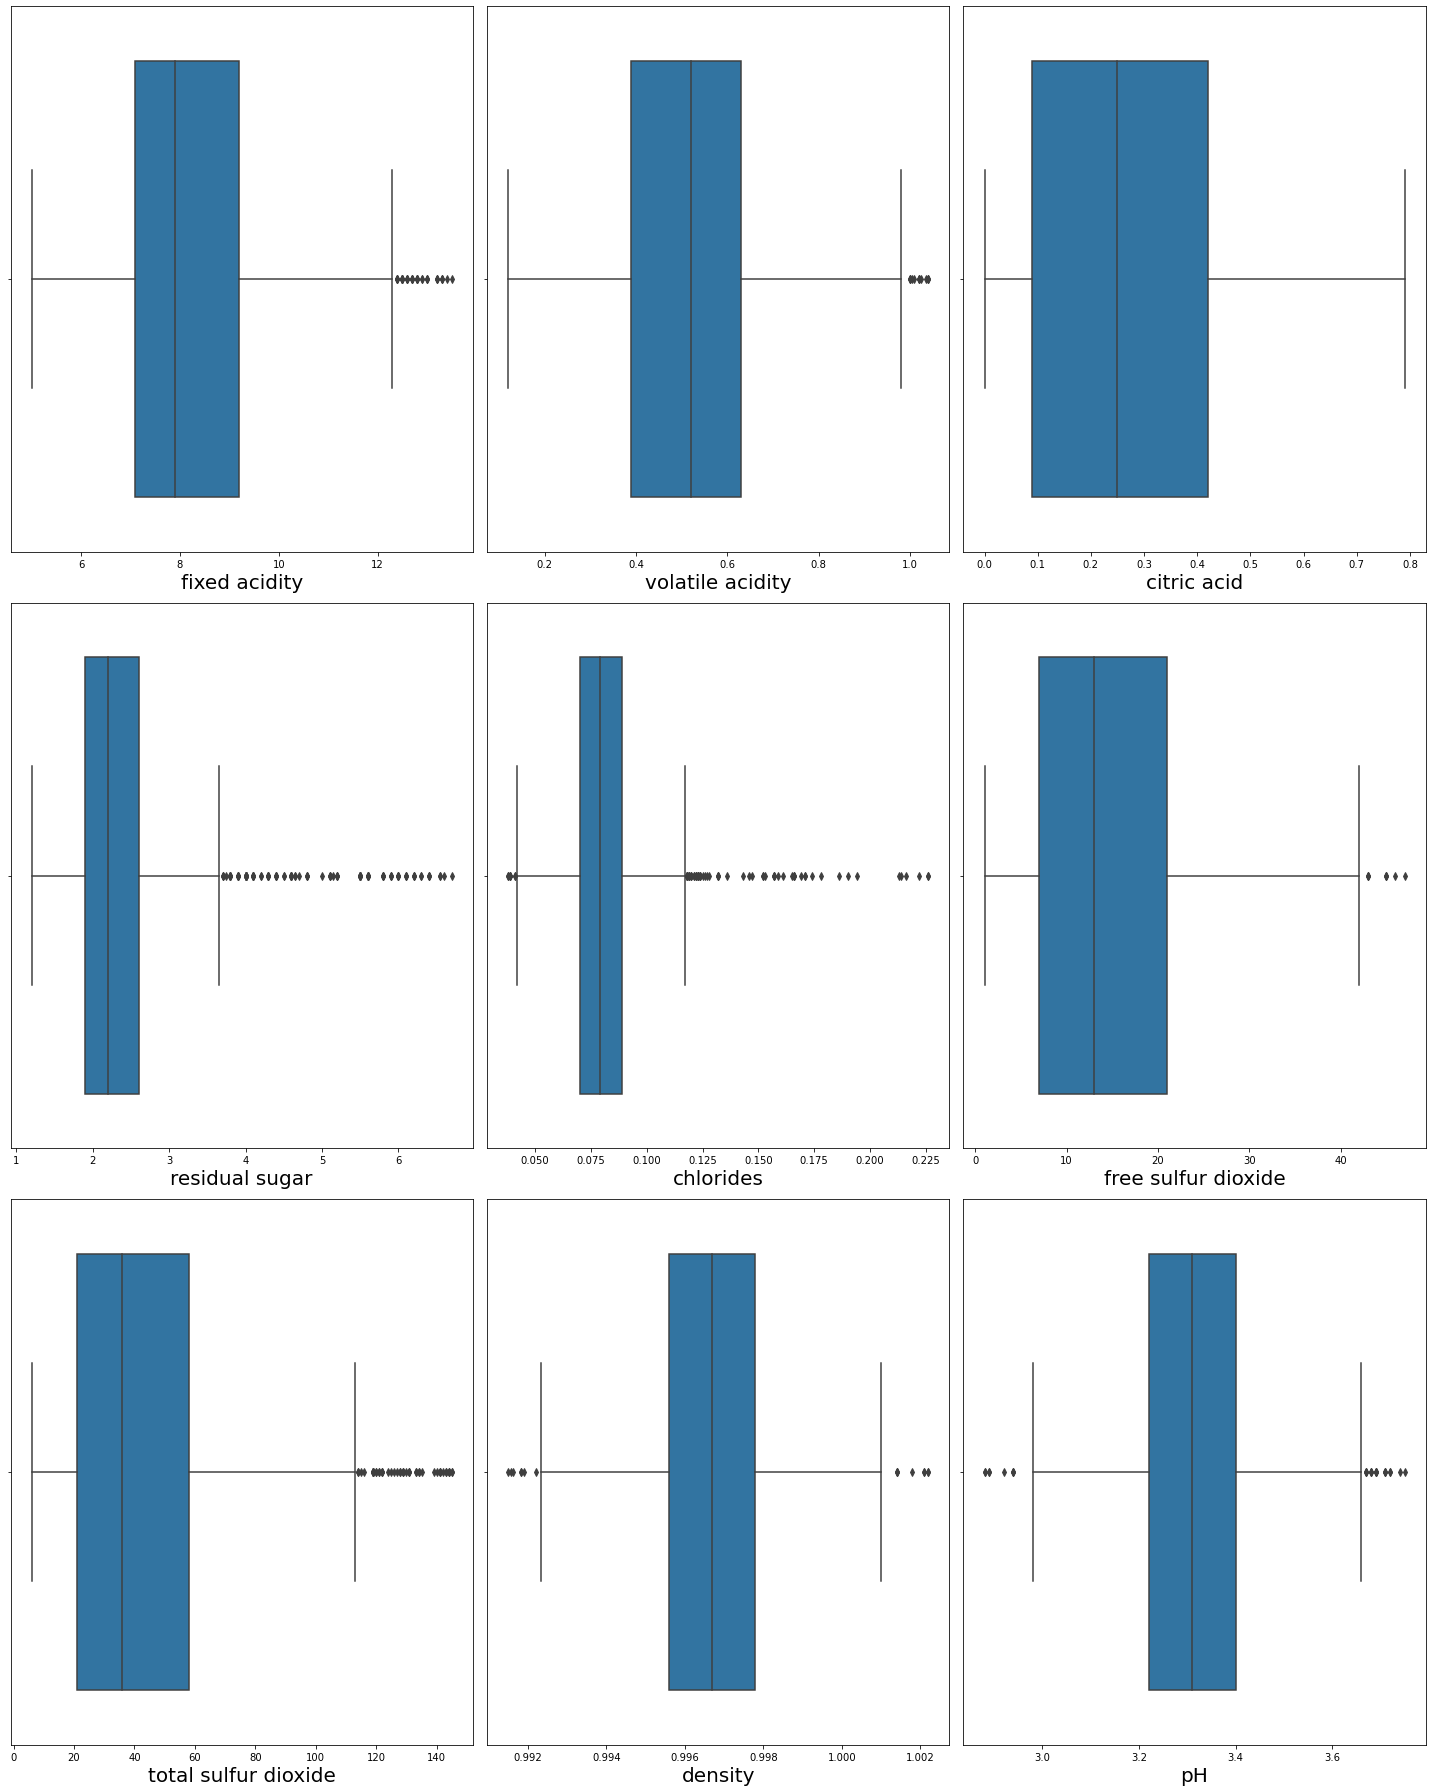

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],orient='V')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


by above box plot we can notice some outliers got reduced and still there r some 

In [19]:
data.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

here some of the skewed ness got reduced with z score further we will reduce by using power transform method using yeo johnson for reduced the skewness

In [20]:
#seperating the features and label columns in two variables
x=data.drop(columns='quality')
y=data['quality']

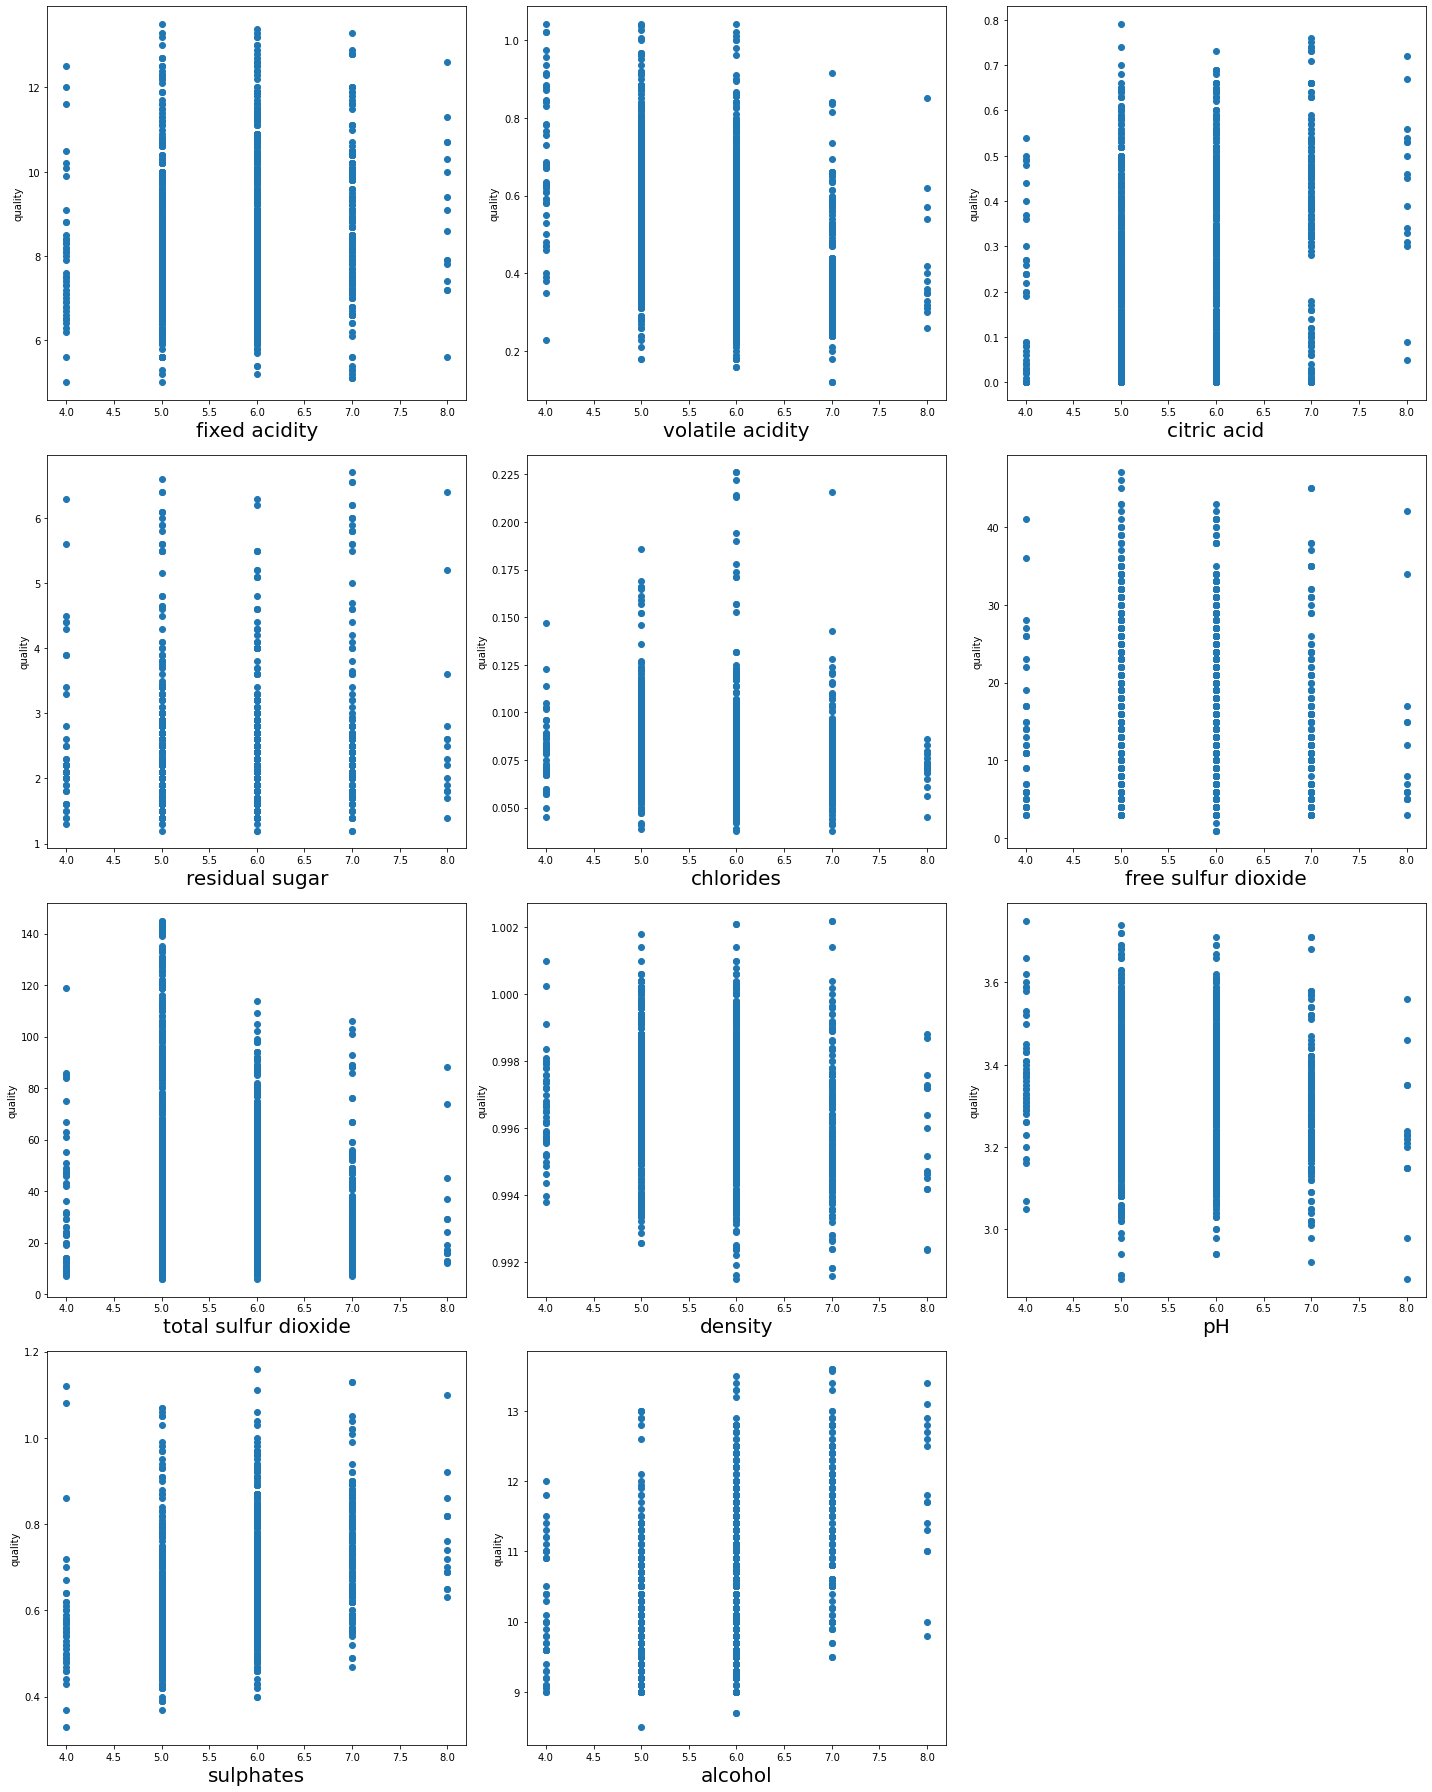

In [21]:
#lets check the relation between features and labels using strip plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(y,x[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality')
    plotnumber+=1
plt.tight_layout()


From scatter plot we can notice that up to a certain level if the critric acid if we mix in wine the quality of the wine increases after a certain point there is no wayt corelated with each other and almost same with the other features.The conclusion is up to a certain level the features need to be mixed with the wine otherwise the quality of the wine is going to be decreased

In [22]:
from sklearn.preprocessing import power_transform

In [23]:
x=power_transform(x,method=('yeo-johnson'))
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [24]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [25]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [26]:
#splitting the data into train,test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [27]:
#using KNN Algorithm
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
#Report table for training data
knn_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Train Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{knn_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Train Result-------------------------
Accuracy Score:74.48%
____________________________________
Classification Report:
                   4           5           6           7     8  accuracy  \
precision   0.400000    0.759494    0.734884    0.752475   0.0  0.744828   
recall      0.114286    0.835267    0.759615    0.617886   0.0  0.744828   
f1-score    0.177778    0.795580    0.747045    0.678571   0.0  0.744828   
support    35.000000  431.000000  416.000000  123.000000  10.0  0.744828   

             macro avg  weighted avg  
precision     0.529371      0.728678  
recall        0.465411      0.744828  
f1-score      0.479795      0.732367  
support    1015.000000   1015.000000  
_____________________________________
confusion matrix:
[[  4  22   9   0   0]
 [  4 360  65   2   0]
 [  2  78 316  20   0]
 [  0  13  34  76   0]
 [  0   1   6   3   0]]



In [28]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
#Report table for testing data
knn_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{knn_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:57.34%
____________________________________
Classification Report:
              4           5           6          7    8  accuracy   macro avg  \
precision   0.0    0.663366    0.513228   0.452381  0.0  0.573394    0.325795   
recall      0.0    0.720430    0.570588   0.306452  0.0  0.573394    0.319494   
f1-score    0.0    0.690722    0.540390   0.365385  0.0  0.573394    0.319299   
support    12.0  186.000000  170.000000  62.000000  6.0  0.573394  436.000000   

           weighted avg  
precision      0.547437  
recall         0.573394  
f1-score       0.557327  
support      436.000000  
_____________________________________
confusion matrix:
[[  0   6   6   0   0]
 [  2 134  46   4   0]
 [  1  54  97  18   0]
 [  0   8  35  19   0]
 [  0   0   5   1   0]]



In [29]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_train)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Training Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Training Result-------------------------
Accuracy Score:100.00%
____________________________________
Classification Report:
              4      5      6      7     8  accuracy  macro avg  weighted avg
precision   1.0    1.0    1.0    1.0   1.0       1.0        1.0           1.0
recall      1.0    1.0    1.0    1.0   1.0       1.0        1.0           1.0
f1-score    1.0    1.0    1.0    1.0   1.0       1.0        1.0           1.0
support    35.0  431.0  416.0  123.0  10.0       1.0     1015.0        1015.0
_____________________________________
confusion matrix:
[[ 35   0   0   0   0]
 [  0 431   0   0   0]
 [  0   0 416   0   0]
 [  0   0   0 123   0]
 [  0   0   0   0  10]]



In [30]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:60.09%
____________________________________
Classification Report:
                   4           5           6          7         8  accuracy  \
precision   0.071429    0.689655    0.597561   0.423077  0.333333  0.600917   
recall      0.083333    0.752688    0.576471   0.354839  0.166667  0.600917   
f1-score    0.076923    0.719794    0.586826   0.385965  0.222222  0.600917   
support    12.000000  186.000000  170.000000  62.000000  6.000000  0.600917   

            macro avg  weighted avg  
precision    0.423011      0.593920  
recall       0.386799      0.600917  
f1-score     0.398346      0.595937  
support    436.000000    436.000000  
_____________________________________
confusion matrix:
[[  1   6   4   1   0]
 [  4 140  35   7   0]
 [  6  47  98  19   0]
 [  3  10  25  22   2]
 [  0   0   2   3   1]]



In [31]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
#Report table for testing data
rfc_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Testing Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{rfc_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Testing Result-------------------------
Accuracy Score:65.37%
____________________________________
Classification Report:
              4           5           6          7         8  accuracy  \
precision   0.0    0.711443    0.588832   0.675676  1.000000   0.65367   
recall      0.0    0.768817    0.682353   0.403226  0.166667   0.65367   
f1-score    0.0    0.739018    0.632153   0.505051  0.285714   0.65367   
support    12.0  186.000000  170.000000  62.000000  6.000000   0.65367   

            macro avg  weighted avg  
precision    0.595190      0.642940  
recall       0.404213      0.653670  
f1-score     0.432387      0.637502  
support    436.000000    436.000000  
_____________________________________
confusion matrix:
[[  0   7   5   0   0]
 [  0 143  41   2   0]
 [  0  46 116   8   0]
 [  0   5  32  25   0]
 [  0   0   3   2   1]]



In [32]:
#Lets use SVM(support vector machine algorithm)
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_train)
#Report table for training data
svm_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Training Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{svm_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Training Result-------------------------
Accuracy Score:70.74%
____________________________________
Classification Report:
              4           5           6           7     8  accuracy  \
precision   0.0    0.720000    0.676275    0.828125   0.0  0.707389   
recall      0.0    0.835267    0.733173    0.430894   0.0  0.707389   
f1-score    0.0    0.773362    0.703576    0.566845   0.0  0.707389   
support    35.0  431.000000  416.000000  123.000000  10.0  0.707389   

             macro avg  weighted avg  
precision     0.444880      0.683261  
recall        0.399867      0.707389  
f1-score      0.408756      0.685447  
support    1015.000000   1015.000000  
_____________________________________
confusion matrix:
[[  0  26   9   0   0]
 [  0 360  69   2   0]
 [  0 105 305   6   0]
 [  0   9  61  53   0]
 [  0   0   7   3   0]]



In [33]:
#Lets use SVM(support vector machine algorithm)
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
#Report table for testing data
svm_report=pd.DataFrame(classification_report(y_test,y_pred,digits=2,output_dict=True))

print('\n--------------------------Testing Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{svm_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Testing Result-------------------------
Accuracy Score:59.17%
____________________________________
Classification Report:
              4           5           6          7    8  accuracy   macro avg  \
precision   0.0    0.681592    0.504808   0.592593  0.0  0.591743    0.355798   
recall      0.0    0.736559    0.617647   0.258065  0.0  0.591743    0.322454   
f1-score    0.0    0.708010    0.555556   0.359551  0.0  0.591743    0.324623   
support    12.0  186.000000  170.000000  62.000000  6.0  0.591743  436.000000   

           weighted avg  
precision      0.571867  
recall         0.591743  
f1-score       0.569786  
support      436.000000  
_____________________________________
confusion matrix:
[[  0   7   5   0   0]
 [  0 137  49   0   0]
 [  0  56 105   9   0]
 [  0   1  45  16   0]
 [  0   0   4   2   0]]



In [34]:
#Finding cross val score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  53.5508946557649


In [35]:
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  46.24173480270174


In [36]:
scr=cross_val_score(rfc,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.134020618556704


In [37]:
scr=cross_val_score(svm,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.06766204526603


In [38]:
#Lets check the difference between the cross validation score and the accuracy
knn=55.96-52.99940751273847
knn

2.960592487261529

In [39]:
DT=60.09-46.313307263893826
DT

13.776692736106178

In [40]:
rfc=66.97-57.13544258798435
rfc

9.834557412015648

In [41]:
svc=59.17-  57.136627562507414
svc

2.033372437492588

The cross val score difference is less for Super vector classifier so the best fit model is svc so lets gohead and find the Hyper parameter tuning to increase the accuracy

In [42]:
#Hyper parameter tuning
param_grid={'C':[0.001,0.1,1,2,3,4,5,6,7],'gamma':[1,2,3,4,5,6,7,8,9]}


In [43]:
gridsearch=GridSearchCV(svm,param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 2, 3, 4, 5, 6, 7],
                         'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [44]:
gridsearch.best_params_

{'C': 1, 'gamma': 1}

In [52]:
#using the grid parameters building the svc model
svm=SVC(C=1,gamma=1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
y_pred

array([6, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6,
       5, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 5,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6,
       5, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5,

In [46]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[  0,   6,   6,   0,   0],
       [  0, 127,  59,   0,   0],
       [  0,  36, 134,   0,   0],
       [  0,   7,  42,  13,   0],
       [  0,   0,   6,   0,   0]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.72      0.68      0.70       186
           6       0.54      0.79      0.64       170
           7       1.00      0.21      0.35        62
           8       0.00      0.00      0.00         6

    accuracy                           0.63       436
   macro avg       0.45      0.34      0.34       436
weighted avg       0.66      0.63      0.60       436



In [48]:
#Accuracy score
score=accuracy_score(y_test,y_pred)
score*100

62.84403669724771

using grid search cv our model accuracy got improved from 51.9% to 62.844%

In [54]:
#Model Saving
import pickle
filename='Wine quality.pkl'
pickle.dump(svm,open(filename,'wb'))

In [55]:
#comparing original data v/s predicted data
a=np.array(y_test)
predicted=np.array(y_pred)
df_com=pd.DataFrame({'Actual':a,'Predicted':predicted},index=range(len(a)))

In [56]:
df_com

,Actual,Predicted
0,7,6
1,6,6
2,5,5
3,6,5
4,4,6
...,...,...
431,5,5
432,5,6
433,5,6
434,5,5


Above r the actual and predicted values for the given wine quality dataset